In [3]:
import numpy as np
from sklearn.model_selection import train_test_split, train_test_split
import pandas as pd

from utils.data import extract_eeg_data, segment_data, kfold_split
from utils.labels import get_pss_labels, get_stai_labels
from utils.valid_recs import get_valid_recs
from features import all_features, time_series_features, hjorth_features, differential_entropy, kymatio_wave_scattering
from classifiers import knn_classification, svm_classification, cnn_classification
import utils.variables as v

In [4]:
valid_recs = get_valid_recs(data_type='ica', output_type = 'mne')

x_dict = extract_eeg_data(valid_recs, data_type='ica', output_type='mne')


Filtering out invalid recordings

Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    R

ERROR:root:1) Failed to read data for recording P006_S002_001
ERROR:root:1) Failed to read data for recording P006_S002_002


Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ..

ERROR:root:1) Failed to read data for recording P028_S001_001
ERROR:root:1) Failed to read data for recording P028_S001_002


Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Returning valid recordings

Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range :

In [5]:
y_dict = get_stai_labels(valid_recs) 
#y_dict = get_pss_labels(valid_recs)

    SubjectNo  D1Y1  D2Y1  J1Y1  J2Y1
0           1    26    30    29    31
1           2    38    41    26    34
2           3    58    56    36    35
3           4    40    45    24    24
4           5    25    31    38    37
5           6    49    58     0     0
6           7    56    50    28    28
7           8    46    37    23    27
8           9    41    47    27    22
9          10    37    20    23    21
10         11    50    49    31    47
11         12    42    47    47    41
12         13    35    35    28    33
13         14    54    35    26    26
14         15    51    55    33    42
15         16    35    38    42    45
16         17    37    35    24    20
17         18    54    62    41    48
18         19    47    52    30    36
19         20    46    38    24    25
20         21    44    54    33    39
21         22    49    51    28    34
22         23    56    53    33    28
23         24    52    58    36    41
24         25    48    62    29    56
25         2

In [6]:
print(len(x_dict))
print(len(y_dict))

103
103


In [7]:
targ_val = 1
rem=[]
for i in y_dict.keys():
    if y_dict[i] is targ_val:
        rem.append(i)
# printing result
print("\nThe extracted keys : \n" + str(rem))

[y_dict.pop(key) for key in rem]
[x_dict.pop(key) for key in rem]
print(f"\nDictionary after removal of keys from y_dict: \n {y_dict.keys()}")
print(f"\nDictionary after removal of keys from x_dict: \n {x_dict.keys()}")


The extracted keys : 
['P002_S001_001', 'P002_S001_002', 'P004_S001_001', 'P004_S001_002', 'P005_S002_001', 'P005_S002_002', 'P008_S001_002', 'P009_S001_001', 'P012_S001_001', 'P012_S002_002', 'P015_S002_002', 'P016_S001_002', 'P016_S002_001', 'P016_S002_002', 'P017_S001_001', 'P018_S002_001', 'P020_S001_002', 'P021_S001_001', 'P021_S002_002', 'P024_S002_002', 'P026_S001_001', 'P026_S001_002', 'P027_S001_002', 'P027_S002_001']

Dictionary after removal of keys from y_dict: 
 dict_keys(['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S002_001', 'P008_S002_002', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001'

In [8]:
x_epochs, y_epochs = segment_data(x_dict, y_dict, epoch_duration=3)


Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 751 original time points ...
1 bad epochs dropped
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 751 original time points ...
1 bad epochs dropped
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 751 original time points ...
1 bad epochs dropped
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 751 original time points ...
1 bad epochs dropped
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 751 original time po

In [9]:
#print(x_epochs)

#x_epochs_df = pd.DataFrame.from_dict(x_epochs)


In [10]:
splits = kfold_split(x_epochs, y_epochs, n_splits=2, shuffle=True, random_state=42)
train_epochs, test_epochs, train_labels, test_labels = splits
y_train = [np.array([v for _, v in train_labels[i].items()]) for i in range(len(train_labels))]
y_test = [np.array([v for _, v in test_labels[i].items()]) for i in range(len(test_labels))]


#x, x_test, y, test_labels = train_test_split(x_epochs, y_epochs, test_size=0.2, random_state=1)
#x_train, x_val, train_labels, val_labels = train_test_split(x, y, test_size=0.25, random_state=1)


# freq_bands = np.array([1, 4, 8, 12, 30, 50])
# features = freq_band_features(dataset, freq_bands)
# features = hjorth_features(dataset)
# features = entropy_features(dataset)
#  features = fractal_features(dataset)

In [11]:
x_train = time_series_features(train_epochs) 
x_test = time_series_features(test_epochs)

In [12]:
print(x_train[0].shape)

print(len(train_epochs[0]))
print(train_epochs[0]['P001_S001_001_epoch0'].shape)
print(train_epochs[0]['P001_S001_001_epoch0'][7].shape[-1])

(3861, 24)
3861
(8, 751)
751


751
Sx shape:  (222, 11)


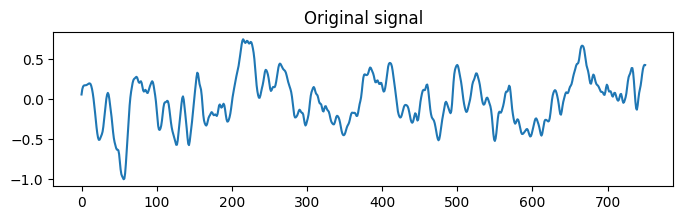

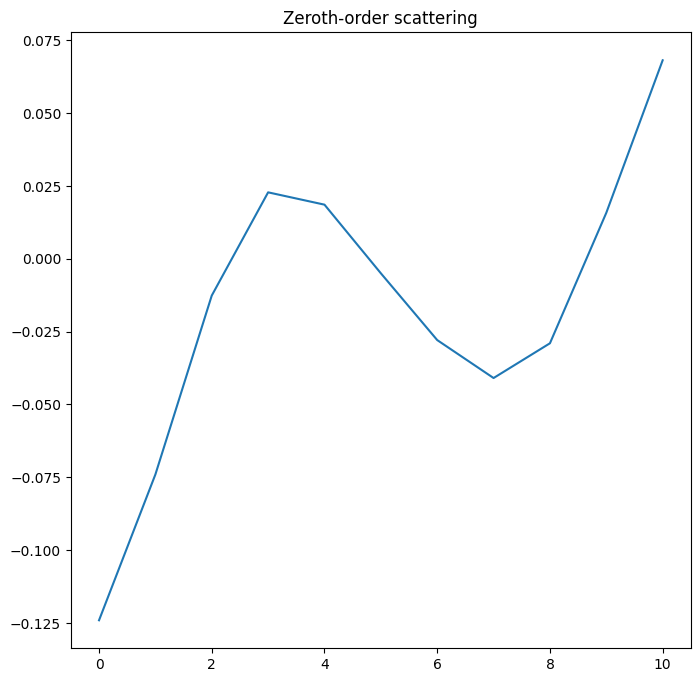

len order 0:  (1, 11)


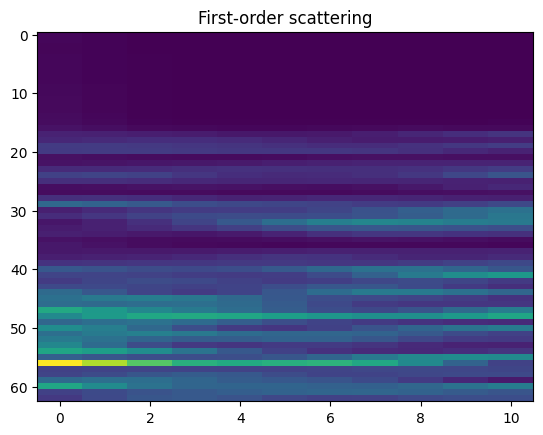

len order 1:  (63, 11)


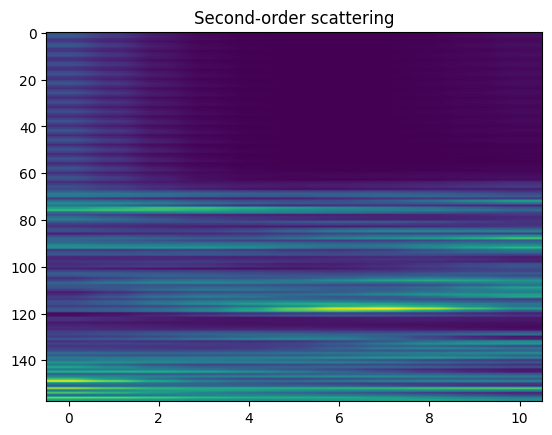

len order 2:  (158, 11)
(222, 11)
[222]
[-1.70969592e-02  3.03375756e-05  3.04880339e-05  2.85558519e-05
  2.90671304e-05  3.24159883e-05  3.49223837e-05  3.45051498e-05
  3.36244504e-05  3.50544412e-05  3.83152823e-05  4.20427206e-05
  4.34355315e-05  4.27843201e-05  4.35299717e-05  5.61853356e-05
  9.85498558e-05  2.48300511e-04  8.64174594e-04  9.63541078e-04
  1.44340654e-03  1.42025733e-03  3.56725321e-04  7.36692583e-04
  1.29795471e-03  1.60899050e-03  1.05258287e-03  5.22150791e-04
  3.01735731e-04  1.02770703e-03  2.15582432e-03  2.01819416e-03
  2.29088324e-03  2.79645186e-03  1.83114710e-03  1.02757721e-03
  3.81636661e-04  2.68006356e-04  7.57740143e-04  1.08157692e-03
  1.57581435e-03  2.68475449e-03  2.64598440e-03  1.87188665e-03
  2.00111035e-03  2.83463681e-03  2.70834664e-03  2.48455883e-03
  3.51693102e-03  5.10923429e-03  2.31016176e-03  2.86549342e-03
  3.09452088e-03  2.67064292e-03  1.83737109e-03  2.66119351e-03
  3.14152191e-03  5.71057099e-03  1.92006325e-03  

In [13]:
"""
Compute the scattering transform of a speech recording
======================================================
This script loads a speech signal consisting of an excerpt from a recording of
*Sense and Sensibility*. We then compute its scattering transform, and display
the zeroth-, first-, and second-order scattering coefficients.
"""

###############################################################################
# Preliminaries
# -------------
#
###############################################################################
# To manipulate the audio signal, we first import NumPy. We also import
# `librosa`, which allows us to automatically download the example signal.

import numpy as np
import librosa

###############################################################################
# We import `matplotlib` to plot the calculated scattering coefficients.

import matplotlib.pyplot as plt

###############################################################################
# Finally, we import the `Scattering1D` class from the `scattering` package.
# The `Scattering1D` class is what lets us calculate the scattering transform

from kymatio.numpy import Scattering1D

###############################################################################
# Scattering setup
# ----------------
# First, we download the signal and extract the second second of it (the first
# second is mostly silence).

#x, sr = librosa.load(librosa.example("libri3"))
#x = x[sr:2 * sr]

###############################################################################
# Once the recording is in memory, we normalize it.
x = train_epochs[0]['P001_S001_001_epoch0'][7]
x = x / np.max(np.abs(x))

###############################################################################
# We are now ready to set up the parameters for the scattering transform.
# First, the number of samples, `T`, is given by the size of our input `x`.
# The averaging scale is specified as a power of two, `2**J`. Here, we set
# `J = 6` to get an averaging, or maximum, scattering scale of `2**6 = 64`
# samples. Finally, we set the number of wavelets per octave, `Q`, to `16`.
# This lets us resolve frequencies at a resolution of `1/16` octaves.

T = x.shape[-1]
print(T)
J = 6
Q = 16

###############################################################################
# Finally, we are able to create the object which computes our scattering
# transform, `scattering`.

scattering = Scattering1D(J, T, Q)

###############################################################################
# Compute and display the scattering coefficients
# -----------------------------------------------
# Computing the scattering transform of a signal is achieved using the
# `__call__` method of the `Scattering1D` class. The output is an array of
# shape `(C, T)`. Here, `C` is the number of scattering coefficient outputs,
# and `T` is the number of samples along the time axis. This is typically much
# smaller than the number of input samples since the scattering transform
# performs an average in time and subsamples the result to save memory.

Sx = scattering(x)
print('Sx shape: ', Sx.shape)
###############################################################################
# To display the scattering coefficients, we must first identify which belong
# to each order (zeroth, first, or second). We do this by extracting the `meta`
# information from the scattering object and constructing masks for each order.

meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

###############################################################################
# First, we plot the original signal `x`.

plt.figure(figsize=(8, 2))
plt.plot(x)
plt.title('Original signal')
plt.show()

###############################################################################
# We now plot the zeroth-order scattering coefficient, which is simply an
# average of the original signal at the scale `2**J`.

plt.figure(figsize=(8, 8))
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')
plt.show()
print('len order 0: ', Sx[order0].shape)

###############################################################################
# We then plot the first-order coefficients, which are arranged along time
# and log-frequency.

plt.imshow(Sx[order1], aspect='auto')
plt.title('First-order scattering')
plt.show()
print('len order 1: ', Sx[order1].shape)

###############################################################################
# Finally, we plot the second-order scattering coefficients. These are also
# organized aling time, but has two log-frequency indices: one first-order
# frequency and one second-order frequency. Here, both indices are mixed along
# the vertical axis.

plt.imshow(Sx[order2], aspect='auto')
plt.title('Second-order scattering')
plt.show()
print('len order 2: ', Sx[order2].shape)
print(Sx.shape)

Sx= np.mean(Sx, axis=-1)
Sx = np.ndarray.flatten(Sx)
print(np.transpose(Sx.shape))
print(np.transpose(Sx))

In [14]:
x_train = kymatio_wave_scattering(train_epochs) 

In [15]:
print(x_train)

[array([[-5.42578327e-03,  7.78834413e-06,  7.81788388e-06, ...,
         1.76381975e-06,  3.02279414e-06,  2.65120063e-06],
       [-5.83978542e-03,  6.92502528e-06,  7.02775703e-06, ...,
         2.63440717e-06,  1.60685299e-06,  9.85974588e-07],
       [ 1.37863400e-02,  2.20341303e-05,  2.24361591e-05, ...,
         4.76503943e-06,  5.09027736e-06,  3.98348975e-06],
       ...,
       [ 1.13228445e-03,  3.59692472e-05,  3.68955033e-05, ...,
         3.55401522e-06,  3.17053883e-06,  1.06394562e-06],
       [-9.26946526e-03,  7.81382507e-05,  8.02736509e-05, ...,
         4.83926048e-06,  5.61117365e-06,  6.18417763e-06],
       [ 9.79713338e-03,  6.56897419e-05,  6.76052908e-05, ...,
         6.46205153e-06,  5.45356564e-06,  7.27686994e-06]]), array([[ 2.59784621e-02,  2.11898372e-04,  2.17284345e-04, ...,
         1.99234228e-06,  8.57314217e-07,  8.04936518e-07],
       [-2.69715439e-03,  2.22050692e-04,  2.27443311e-04, ...,
         2.67121176e-06,  3.17161335e-06,  1.96207713

In [16]:
x_test = kymatio_wave_scattering(test_epochs)

In [19]:
print(x_test)

[array([[ 2.59784621e-02,  2.11898372e-04,  2.17284345e-04, ...,
         1.99234228e-06,  8.57314217e-07,  8.04936518e-07],
       [-2.69715439e-03,  2.22050692e-04,  2.27443311e-04, ...,
         2.67121176e-06,  3.17161335e-06,  1.96207713e-06],
       [-1.04061203e-02,  2.19963648e-04,  2.25431266e-04, ...,
         1.75842719e-06,  1.49815781e-06,  2.74524822e-06],
       ...,
       [-1.06129199e-02,  1.13832922e-05,  1.16131978e-05, ...,
         1.98972160e-06,  1.04218697e-06,  1.07076939e-06],
       [-1.54496593e-02,  5.83057989e-05,  5.96834774e-05, ...,
         3.80761816e-06,  6.55055458e-06,  2.25507660e-06],
       [-4.51529619e-02,  1.41227623e-04,  1.44757114e-04, ...,
         6.86721589e-06,  7.28169717e-06,  1.08932543e-05]]), array([[-5.42578327e-03,  7.78834413e-06,  7.81788388e-06, ...,
         1.76381975e-06,  3.02279414e-06,  2.65120063e-06],
       [-5.83978542e-03,  6.92502528e-06,  7.02775703e-06, ...,
         2.63440717e-06,  1.60685299e-06,  9.85974588

### KNN

In [20]:
print('ica data')
knn_classification(x_train, x_test, y_train, y_test)

ica data


c:\Users\ITG7\anaconda3\envs\MASTER_MNE\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ITG7\anaconda3\envs\MASTER_MNE\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ITG7\anaconda3\envs\MASTER_MNE\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "c:\Users\ITG7\anaconda3\envs\MASTER_MNE\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_p


Results for fold 1:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      2376
           2       0.41      0.33      0.36      1584

    accuracy                           0.54      3960
   macro avg       0.51      0.51      0.50      3960
weighted avg       0.53      0.54      0.53      3960

[[1622  754]
 [1064  520]]


c:\Users\ITG7\anaconda3\envs\MASTER_MNE\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ITG7\anaconda3\envs\MASTER_MNE\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ITG7\anaconda3\envs\MASTER_MNE\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "c:\Users\ITG7\anaconda3\envs\MASTER_MNE\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_p


Results for fold 2:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2277
           2       0.52      0.49      0.51      1584

    accuracy                           0.61      3861
   macro avg       0.59      0.59      0.59      3861
weighted avg       0.60      0.61      0.61      3861

[[1559  718]
 [ 800  784]]


### SVM

In [21]:
print('ica data')
print(svm_classification(x_train, x_test, y_train, y_test))


ica data

Results for fold 1:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      2376
           2       0.45      0.40      0.42      1584

    accuracy                           0.56      3960
   macro avg       0.54      0.54      0.54      3960
weighted avg       0.56      0.56      0.56      3960

[[1601  775]
 [ 950  634]]

Results for fold 2:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      2277
           2       0.55      0.50      0.53      1584

    accuracy                           0.63      3861
   macro avg       0.61      0.61      0.61      3861
weighted avg       0.62      0.63      0.63      3861

[[1632  645]
 [ 790  794]]
None


# Convolutional Neural Network

In [22]:

print(len(x_train[0]))
print(len(y_train[0]))

print(len(x_train[1]))
print(len(y_train[1]))

print(len(x_test[0]))
print(len(y_test[0]))

print(len(x_test[1]))
print(len(y_test[1]))

3861
3861
3960
3960
3960
3960
3861
3861


In [23]:
print('ica data')
cnn_classification(x_train, x_test, y_train, y_test)


ica data


ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_1/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](conv2d_1/Relu)' with input shapes: [?,1,13,64].